In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
from scipy.stats import kstest, norm
import numpy as np
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Abalone/train.csv")

In [3]:
#encode the categorical data to numeric

In [4]:
labeler=LabelEncoder()
sex_label=labeler.fit_transform(train["Sex"])

In [5]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'F': 0, 'I': 1, 'M': 2}


In [6]:
train["Sex"]=sex_label

In [7]:
#Create an interactive variables

In [8]:
train["Diff_Len_Diametr"]=train["Length"]-train["Diameter"]

In [9]:
train["Net Weight"]=train["Whole weight"]-train["Whole weight.1"]-train["Whole weight.2"]-train["Shell weight"]

In [10]:
#Check for multicollinearity
train.corr()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Diff_Len_Diametr,Net Weight
id,1.000000,-0.003553,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938,0.005425,0.004311
Sex,-0.003553,1.000000,-0.020774,-0.021648,-0.029732,-0.027787,-0.017512,-0.032769,-0.033301,-0.026308,-0.013135,-0.023443
Length,0.004724,-0.020774,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786,0.834217,0.463946
Diameter,0.004290,-0.021648,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832,0.746830,0.468523
Height,0.005916,-0.029732,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772,0.714337,0.465563
Whole weight,0.005228,-0.027787,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274,0.730877,0.553063
Whole weight.1,0.004203,-0.017512,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067,0.727188,0.401208
Whole weight.2,0.004878,-0.032769,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954,0.719665,0.454087
Shell weight,0.005887,-0.033301,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766,0.697716,0.472541
Rings,0.000938,-0.026308,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000,0.445330,0.428556


In [11]:
train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings',
       'Diff_Len_Diametr', 'Net Weight'],
      dtype='object')

In [12]:
#Remove hightly correlated variables to address multicollinearity

In [13]:
df=train[['id', 'Sex', 'Height', 'Diff_Len_Diametr', 'Net Weight', 'Rings']]

In [14]:
#check for outliers

In [15]:
def IntQ(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return ("Outliers:", outliers)

In [16]:
indexes=[]
for i in df.columns:
    indexes.append(IntQ(train[i])[1].index.tolist())
indexes=list(itertools.chain.from_iterable(indexes))

In [17]:
len(indexes)

11597

In [18]:
otlr_rm=df.drop(index=indexes)

In [19]:
#Standardize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(otlr_rm), columns=otlr_rm.columns)

In [20]:
transformed_X = pd.DataFrame(pt.fit_transform(df_scaled[['Sex', 'Height', 'Diff_Len_Diametr', 'Net Weight']]))
transformed_X.columns=['Sex', 'Height', 'Diff_Len_Diametr', 'Net Weight']

(array([22384.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0., 31263.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 26936.]),
 array([-1.33237155, -1.24707747, -1.1617834 , -1.07648932, -0.99119524,
        -0.90590117, -0.82060709, -0.73531301, -0.65001893, -0.56472486,
        -0.47943078, -0.3941367 , -0.30884263, -0.22354855, -0.13825447,
        -0.0529604 ,  0.03233368,  0.11762776,  0.20292184,  0.28821591,
         0.37350999,  0.45880407,  0.54409814,  0.62939222,  0.7146863 ,
         0.79998038,  0.88527445,  0.97056853,  1.05586261,  1.14115668,
         1.22645076]),
 <BarContainer object of 30 artists>)

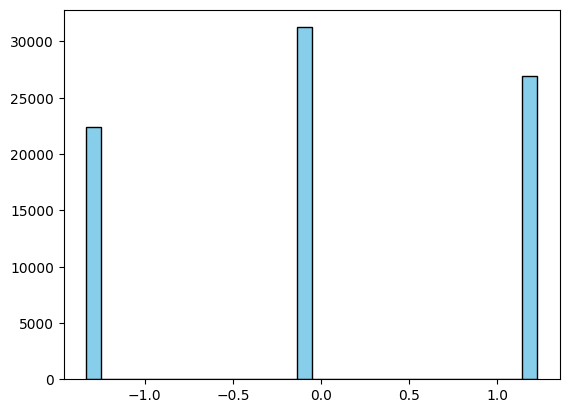

In [21]:
plt.hist(transformed_X["Sex"], bins=30, color='skyblue', edgecolor='black')

(array([ 209.,  453.,  527., 1507., 1153., 3157., 1707., 5068., 3469.,
        5408., 2854., 7673., 3455., 4844., 9945., 5411., 4789., 6641.,
        2412., 3168., 1575., 1254., 2299.,  636.,  373.,  147.,  192.,
          92.,   73.,   92.]),
 array([-2.60257352, -2.40549571, -2.20841789, -2.01134008, -1.81426227,
        -1.61718446, -1.42010665, -1.22302884, -1.02595103, -0.82887322,
        -0.63179541, -0.43471759, -0.23763978, -0.04056197,  0.15651584,
         0.35359365,  0.55067146,  0.74774927,  0.94482708,  1.14190489,
         1.3389827 ,  1.53606052,  1.73313833,  1.93021614,  2.12729395,
         2.32437176,  2.52144957,  2.71852738,  2.91560519,  3.112683  ,
         3.30976081]),
 <BarContainer object of 30 artists>)

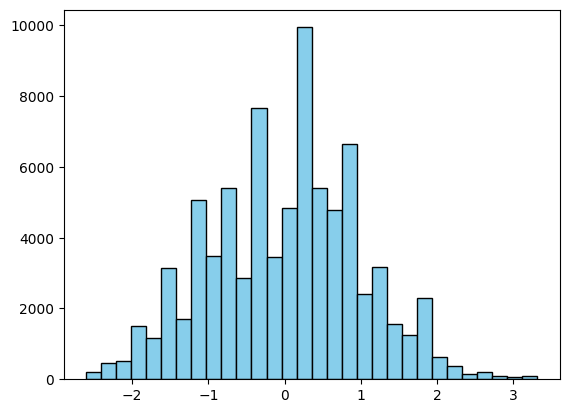

In [22]:
plt.hist(transformed_X["Height"], bins=30, color='skyblue', edgecolor='black')

(array([4.360e+02, 6.790e+02, 9.570e+02, 1.341e+03, 1.835e+03, 2.053e+03,
        2.890e+03, 3.448e+03, 4.357e+03, 1.000e+00, 5.066e+03, 5.015e+03,
        6.294e+03, 7.386e+03, 7.264e+03, 1.000e+00, 8.562e+03, 5.760e+03,
        5.017e+03, 0.000e+00, 3.943e+03, 2.772e+03, 1.948e+03, 0.000e+00,
        1.369e+03, 9.550e+02, 0.000e+00, 5.970e+02, 3.920e+02, 2.450e+02]),
 array([-2.44916022, -2.27226181, -2.0953634 , -1.91846499, -1.74156657,
        -1.56466816, -1.38776975, -1.21087134, -1.03397293, -0.85707452,
        -0.68017611, -0.5032777 , -0.32637929, -0.14948088,  0.02741753,
         0.20431594,  0.38121435,  0.55811277,  0.73501118,  0.91190959,
         1.088808  ,  1.26570641,  1.44260482,  1.61950323,  1.79640164,
         1.97330005,  2.15019846,  2.32709687,  2.50399528,  2.68089369,
         2.8577921 ]),
 <BarContainer object of 30 artists>)

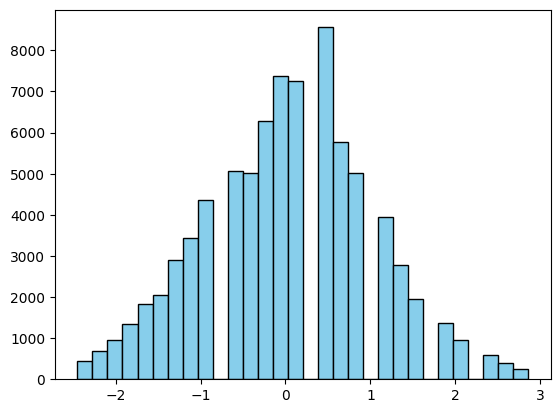

In [23]:
plt.hist(transformed_X["Diff_Len_Diametr"], bins=30, color='skyblue', edgecolor='black')

(array([  43.,   44.,   66.,   64.,  109.,  126.,  176.,  245.,  389.,
         576.,  865., 1353., 2134., 3386., 5598., 6767., 7092., 7006.,
        6267., 6238., 5943., 5392., 4711., 4168., 3367., 2838., 2077.,
        1619., 1133.,  791.]),
 array([-4.14473693, -3.92585237, -3.70696781, -3.48808325, -3.2691987 ,
        -3.05031414, -2.83142958, -2.61254502, -2.39366046, -2.17477591,
        -1.95589135, -1.73700679, -1.51812223, -1.29923767, -1.08035312,
        -0.86146856, -0.642584  , -0.42369944, -0.20481488,  0.01406967,
         0.23295423,  0.45183879,  0.67072335,  0.88960791,  1.10849246,
         1.32737702,  1.54626158,  1.76514614,  1.9840307 ,  2.20291525,
         2.42179981]),
 <BarContainer object of 30 artists>)

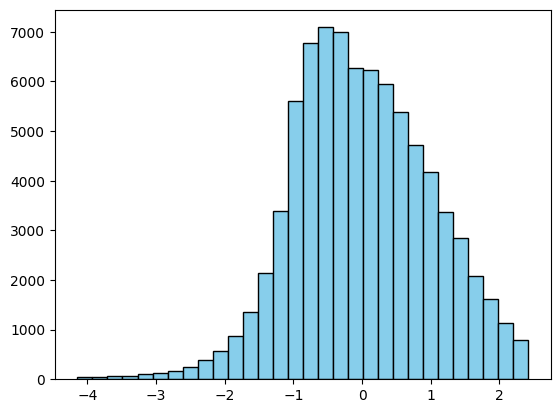

In [24]:
plt.hist(transformed_X["Net Weight"], bins=30, color='skyblue', edgecolor='black')

In [25]:
X_train=transformed_X

In [26]:
y_train=df_scaled["Rings"]

In [27]:
#train the model and view summary

In [28]:
x_const=sm.add_constant(X_train)
model=sm.OLS(y_train, x_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.986e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:39:28   Log-Likelihood:                -86695.
No. Observations:               80583   AIC:                         1.734e+05
Df Residuals:                   80578   BIC:                         1.734e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.967e-16      0.002  -7.87e-14      1.000      -0.005       0.005
Sex                  0.0031      0.002      1.229      0.219      -0.002       0.008
Height               0.6528      0.004    178.133      0.000       0.646       0.660
Diff_Len_Diametr    -0.0084      0.004     -2.379      0.017      -0.015      -0.001
Net Weight           0.1166      0.003     42.073      0.000       0.111       0.122
==============================================================================
Omnibus:                    13161.601   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23010.164
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X_train2=transformed_X[['Height', 'Diff_Len_Diametr', 'Net Weight']]

In [30]:
y_train2=df_scaled["Rings"]

In [31]:
x_const2=sm.add_constant(X_train2)
model2=sm.OLS(y_train2, x_const2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.649e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:39:28   Log-Likelihood:                -86696.
No. Observations:               80583   AIC:                         1.734e+05
Df Residuals:                   80579   BIC:                         1.734e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.967e-16      0.002  -7.87e-14      1.000      -0.005       0.005
Height               0.6527      0.004    178.132      0.000       0.646       0.660
Diff_Len_Diametr    -0.0083      0.004     -2.365      0.018      -0.015      -0.001
Net Weight           0.1166      0.003     42.080      0.000       0.111       0.122
==============================================================================
Omnibus:                    13157.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23001.131
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       4.524   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
test=pd.read_csv("Abalone/test.csv")

In [33]:
test["Diff_Len_Diametr"]=test["Length"]-test["Diameter"]
test["Net Weight"]=test["Whole weight"]-test["Whole weight.1"]-test["Whole weight.2"]-test["Shell weight"]

In [34]:
X_test=test[['Height', 'Diff_Len_Diametr', 'Net Weight']]

In [42]:
X_test2=test[['Sex', 'Height', 'Diff_Len_Diametr', 'Net Weight']]

In [46]:
sex_label2=labeler.fit_transform(X_test2["Sex"])
X_test2["Sex"]=sex_label2

In [47]:
X_new = sm.add_constant(X_test)
X_new2 = sm.add_constant(X_test2)

In [48]:
X_new2

,const,Sex,Height,Diff_Len_Diametr,Net Weight
0,1.0,2,0.155,0.170,0.0065
1,1.0,2,0.160,0.120,0.0100
2,1.0,2,0.140,0.140,0.0620
3,1.0,2,0.145,0.080,0.1000
4,1.0,1,0.110,0.090,0.0285
...,...,...,...,...,...
60406,1.0,1,0.085,0.085,0.0275
60407,1.0,0,0.145,0.115,0.0840
60408,1.0,1,0.155,0.150,0.2640
60409,1.0,0,0.190,0.135,0.1125


In [49]:
predictions = np.maximum(model2.predict(X_new), 0)
predictions2 = np.maximum(model.predict(X_new2), 0)

In [50]:
test["Rings"]=predictions

In [51]:
submission=test[['id', 'Rings']]

In [52]:
submission.to_csv("Abalone_Submission2.csv")